In [7]:
import skimage.io
import matplotlib.pyplot as plt

4.0
4.0
2.0


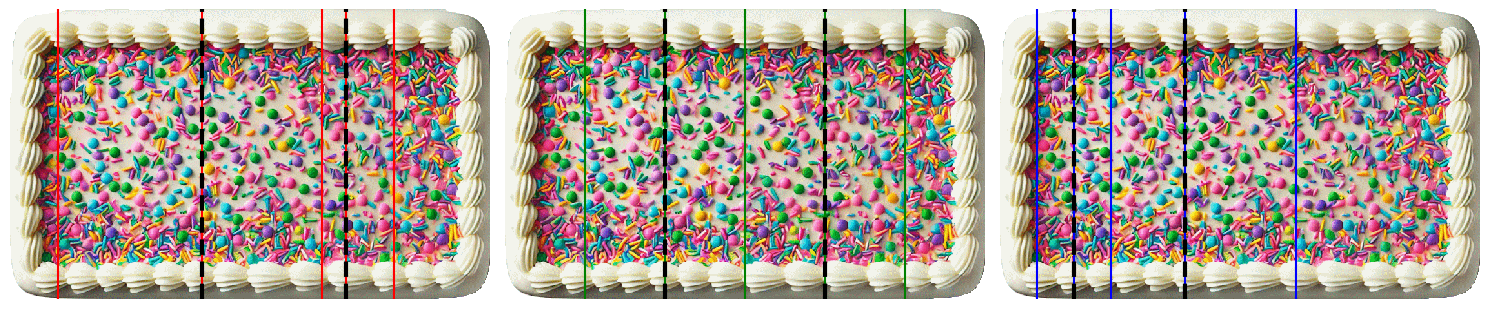

In [75]:
# Initialise piecewise uniform values
values = [[1, 4, 6.5, 7, 8, 10],
          [2, 4, 6, 8, 10, 12],
          [1, 2, 3, 5, 8, 13]]

# Declare array of colours for each value set
colors = ["red", "green", "blue"]

# Read in the cake image
cake = skimage.io.imread("cake.png") / 255.0

# Instantiate a figure
fig, axs = plt.subplots(1, len(values), figsize=(15, 5))

# Loop over the values array 
for idx, (value_set, ax) in enumerate(zip(values, axs)):
    ax.imshow(cake, cmap="gray", interpolation="nearest")
    ax.axis("off")

    # Declare the end of the image and the values
    pixel_width = cake.shape[1]
    slice_width = value_set[-1]

    # Plot a line for each equal value section
    for value in value_set[:-1]:
        position = pixel_width * (value / slice_width)
        ax.axvline(x=position, color= colors[idx], linestyle='-', linewidth=1.5)

    print(cut_position(value_set, 1/3))
    ax.axvline(x=pixel_width * (cut_position(value_set, 1/3) / slice_width), color="black", linestyle='--', linewidth=3)
    ax.axvline(x=pixel_width * (cut_position(value_set, 2/3) / slice_width), color="black", linestyle='--', linewidth=3)

# Display the figure with a tight layout
plt.tight_layout()
plt.show()



In [ ]:
# Declare a function to return the total value of the piecewise uniform value distribution
def total_value(values):
    return len(values)

# Declare a function to return the cut position representing a given ratio of the cake's value
def cut_position(values, ratio):
    total = total_value(values)
    target = total * ratio

    if type(target) == int:
        return values[target-1]
    else:
        delta_target = target - int(target)
        delta_values = values[int(target)] - values[int(target)-1]
        return values[int(target)-1] + delta_target * delta_values



4.0